In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

math = pd.read_csv('stud_math.xls')

In [2]:
display(math.head(10))
math.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

# Анализ возраста участников

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

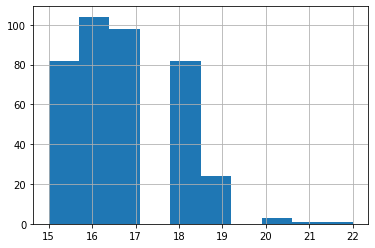

In [18]:
math.age.hist()
math.age.describe()


Разброс возрастов студентов невелик - раница между самым старшим и самым младшим учениками всего 7 лет. Несмотря на то, что среди значений возраста формально есть выбросы, в исключении их из общей статистики смысла нет. 

# Анализ уровня образования родителей

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

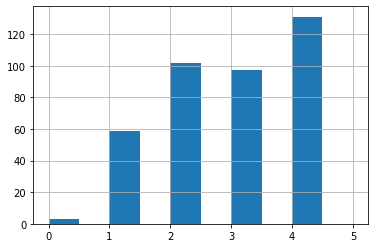

In [30]:
math.Medu.hist(bins = 10, range = (0, 5))
math.Medu.describe()

Матери большинства студентов имеют среднее образование, а у трети есть высшее образование.
Для 24 студентов данные об образовании матери отсутствуют.

count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

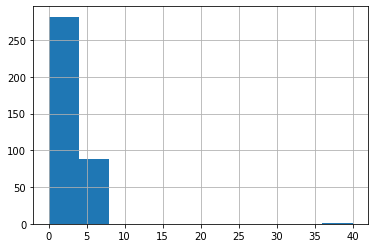

In [22]:
math.Fedu.hist()
math.Fedu.describe()

Похоже, здесь есть выброс - шкала образования пятибальная. Однако, в датасете нет выбросов ниже нуля, а это значит, что возможные выбросы "вниз" исключать не стоит - можно остаться без данных об учениках, чьи отцы не имеют никакого образования. Значит, выбрасываем только значения отстоящие от верхнего квартиля больше, чем на 1.5 межквартильных разиаха.

25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0, 4.5].


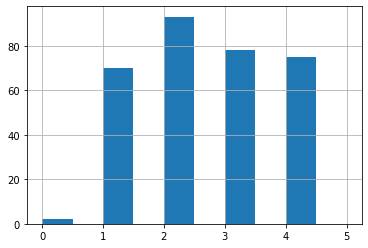

In [53]:
median = math.Fedu.median()
IQR = math.Fedu.quantile(0.75) - math.Fedu.quantile(0.25)
perc25 = math.Fedu.quantile(0.25)
perc75 = math.Fedu.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=0, l=perc75 + 1.5*IQR))
math.Fedu.loc[math.Fedu.between(0, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 5))
math=math.loc[math.Fedu.between(0, perc75 + 1.5*IQR)]

Образование отцов в среднем ниже образования матерей. Возможно, всё по тому, что женщине без образования сложнее найти работу.

# Время на дорогу до школы

count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

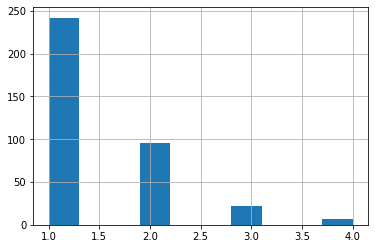

In [32]:
math.traveltime.hist()
math.traveltime.describe()


Большинство учеников живут в 15' от школы. Более 60' на дорогу согласны тратить всего несколько человек.Таким образом, распределение параметра напоминает полунормальное, выбросов нет.

# Время внешкольных занятий


count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

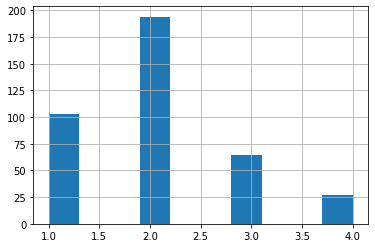

In [34]:
math.studytime.hist()
math.studytime.describe()


Большинство школьников тратит на внешкольную учёбу не более 2.5 часов в неделю. Тех, кто учится больше оказалось меньше четверти от общего количества. Распределение напоминает нормальное, смещённое влево, выбросов нет.


# Количество внеучебных неудач

count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

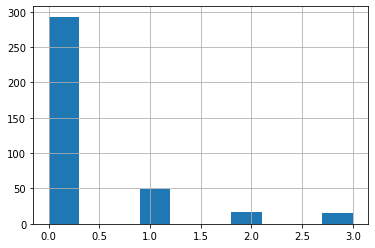

In [35]:
math.failures.hist()
math.failures.describe()

У большинства учеников всё хорошо. Распределение признака напоминает полунормальное, выбросов нет.

# Отношения в семье

count    368.000000
mean       3.937500
std        0.927277
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

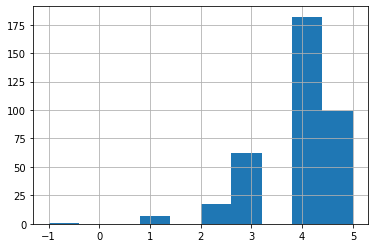

In [36]:
math.famrel.hist()
math.famrel.describe()

Кажется, у одного из учеников всё настолько плохо, что он даже поставил знак минус. Увы, его кейс придётся исключить из датасета как выброс.

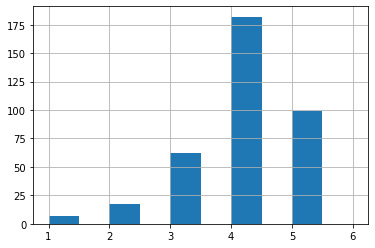

In [48]:
math.famrel.loc[math.famrel.between(0, 5)].hist(bins =10, range = (1, 6))
math=math.loc[math.famrel.between(0, 5)]


Итак, большинство школьников считает, что отношения в их семьях хорошие или очень хорошие, распределение параметра похоже на нормальное, смещенное вправо.

# Свободное время

count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

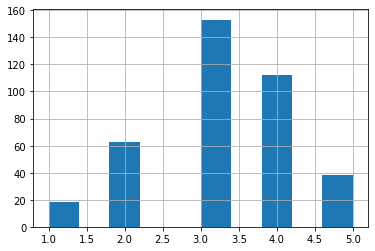

In [46]:
math.freetime.hist()
math.freetime.describe()

Данный признак имеет нормальное распределение, без выбросов, что вполне логично. Впрочем, оценка свободного времени не в часах, а в баллах - это субъективная оценка. Логично, что большинство учеников дало ответ '3' - не много, но и не мало. Будь шкала оценки свободного времени хоть как-то привязана к часам, мы бы, возможно, увидели смещение нормального распределения влево или вправо.

# Время с друзьями

count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

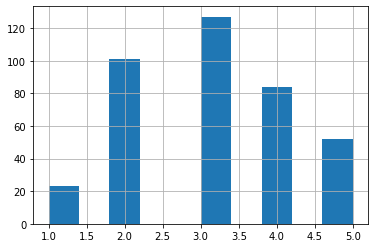

In [47]:
math.goout.hist()
math.goout.describe()

Здесь мы тоже видим картину, похожую на нормальное распределение без выбросов, впрочем, с некоторыми искажениями. Как ни странно, среди старшеклассников тех, кому хватает времени на друзей почти вдвое больше, чем тех, кому его совершенно не хватает.

# Показатель здоровья

count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

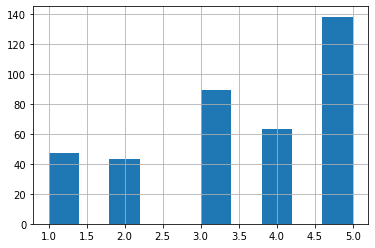

In [48]:
math.health.hist()
math.health.describe()

Распределение признака похоже на полунормальное,что вполне логично. Молодые люди, как правило, здоровы. Однако, тех, кто оценил своё здоровье на '3' оказалось аномально много. Возможно, это связано с тем, что старшеклассникам свойственно испытывать стресс и оценивать своё здоровье хуже, чем оно есть на самом деле.К счастью, эта графа заполнена без ошибок, выбросов нет. 

# Количество пропущенных занятий

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

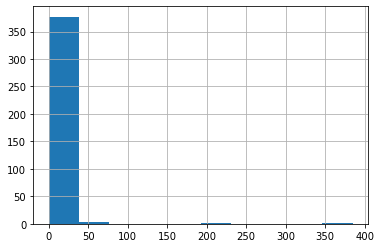

In [50]:
math.absences.hist()
math.absences.describe()

Кажется в датасет случайно попала Грета Тумберг - как иначе объяснить пропуск 385 уроков? Следует исключить подобные выбросы из набора данных. 

In [51]:
IQR = math.absences.quantile(0.75) - math.absences.quantile(0.25)
perc25 = math.absences.quantile(0.25)
perc75 = math.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25, l=perc75 + 1.5*IQR))

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [0.0, 20.0].


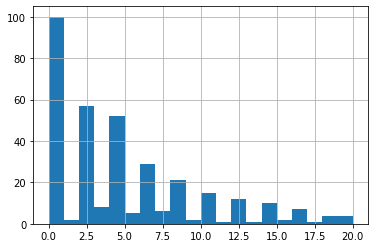

In [52]:
math.absences.loc[math.absences.between(perc25, perc75 + 1.5*IQR)].hist(bins = 20, range = (0, 20))
math=math.loc[math.absences.between(perc25, perc75 + 1.5*IQR)]

Здесь мы видим, что распределение признака полунормальное, и это в целом логично. Большинство школьников оказались добросовестными и старались не пропускать занятия. Особый интерес представляют "провалы" в области нечетных значений количества пропущенных уроков. Интересно, что бы по этому поводу сказал г-н Шпилькин?

# Оценка за экзамен по математике

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

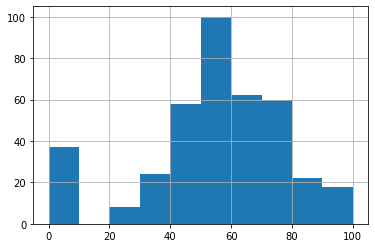

In [75]:
math.score.hist()
math.score.describe()

Оценка по математике вполне соответствует нормальному распределению, выбросов, расходящихся со здравым смыслом, нет. Сравнительно большое количество учеников, получивших за экзамен от 0 до 10 баллов, вероятно, это студенты, которые вовсе не подготовились к экзамену и сдали пустой бланк.


# Корреляционный анализ

In [55]:
correlation = math.corr()

<AxesSubplot:>

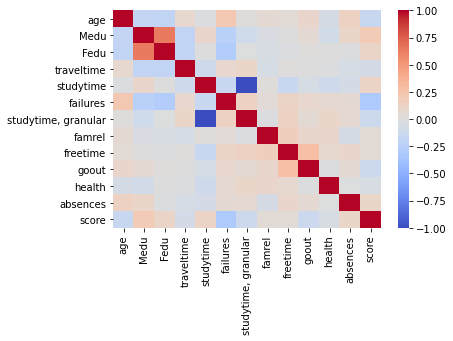

In [56]:

sns.heatmap(correlation, annot=False, cmap='coolwarm')

Осталось рассмотреть одну загадочную колонку - studytime, granular.

In [60]:
#Переименуем колонку для удобства
math.rename(columns={'studytime, granular': 'studytime_granular'}, inplace=True)

count    313.000000
mean      -6.115016
std        2.573197
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime_granular, dtype: float64

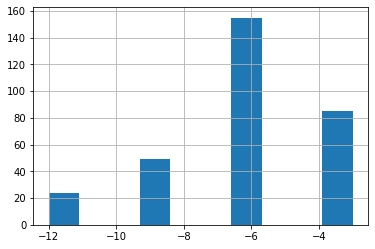

In [61]:
math.studytime_granular.hist()
math.studytime_granular.describe()

Судя по тому, что этот параметр имеет нормальное распределение и однозначную отрицательную корреляцию со временем, уходящим на внешкольную учебу, здесь имеется ввиду объективный показатель свободного времени учеников.

# Так что же влияет на оценку за экзамен по математике?

In [62]:
correlation.loc[:, ['score']].sort_values(by=['score'])

,score
failures,-0.311995
age,-0.152937
goout,-0.127803
"studytime, granular",-0.119395
traveltime,-0.067642
health,-0.046172
freetime,0.042375
famrel,0.045598
absences,0.107494
Fedu,0.114211


И так, наиболее сильная положительная связь наблюдается между результатом экзамена по математике и уровнем образования матери. Сложно сказать, с чем это связано - может быть дети образованных матерей более любознательны и склонны к самообразованию? Или такие матери больше беспокоятся об успеваемости своих детей и прививают им больший уровень самодисциплины?
На втором месте количество внешкольной учебы. Что ж, вполне логично. Возможно, она, как раз, и заключается в дополнительных уроках математики.
Слабая положительная связь прослежтвается между успеваемостью и образованием отца, тёплыми отношениями в семье и количеством пропусков. Последнее особенно любопытно. Быть может, злостные прогульщики лучше высыпаются и демонстрируют лучший результат на экзамене?
Наиболее сильная отрицательная связь между оценкой и количеством внеучебных неудач. На следующем месте с конца - возраст. Если посмотреть на "карту" корреляций можно увидеть, что эти два параметра связаны между собой. Возможно, ученикам постарше приходится самостоятельно зарабатывать себе на жизнь - некоторые неудачи здесь неизбежны. Взрослая жизнь такая взрослая, увы. 
Далее идут субъективный показатель времени с друзьями и обратный показатель времени на учёбу. Логично. Кто меньше готовится самостоятельно и меньше концентрируется на учебе, тот хуже сдаёт.
Самое слабое отрицательное влияние на оценку по математике оказывают время на дорогу до школы и показатель здоровья. 
А, вот, не влияло на оценку куличество свободного времени после школы. Очевидно, вся суть не в том, сколько времени остаёся у ученика, а чем он это время занимает.

# Признаки, представленные номинативными переменными

In [11]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (10, 4))
    sns.boxplot(x=column, y='score', 
                data=math.loc[math.loc[:, column].isin(math.loc[:, column].value_counts().index[:])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
def get_stat_dif(column):
    cols = math.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(math.loc[math.loc[:, column] == comb[0], 'score'], 
                        math.loc[math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
        else:
            print('Статистически значимых различий нет')

# Школа

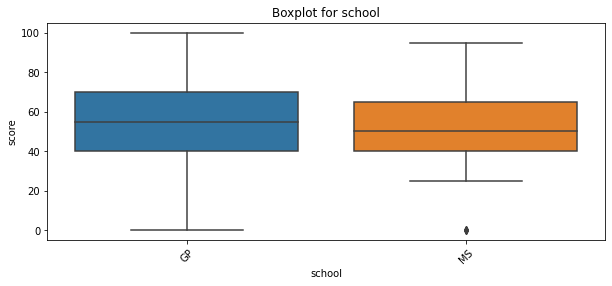

In [4]:
for col in ['school']:
    get_boxplot(col)

В школе 'GP' выше медиана, однако больше разброс; в школе 'MS' медиана ниже, но и разброс меньше. Средние значения могут быть очень близкими. Чтобы проверить гипотезу о статистическом различии оценок в двух школах воспользуемся функцией 'get_stat_dif'.

In [12]:
for col in ['school']:
    get_stat_dif(col)

Статистически значимых различий нет


# Пол (или всё-таки гендер?) ученика

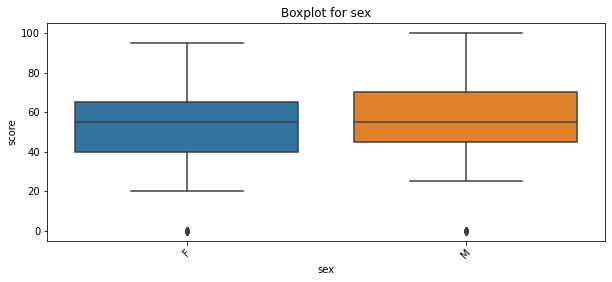

In [13]:
for col in ['sex']:
    get_boxplot(col)

In [14]:
for col in ['sex']:
    get_stat_dif(col)

Статистически значимых различий нет


Юноши и Девушки справились с экзаменом одинаково. 

# Место проживания

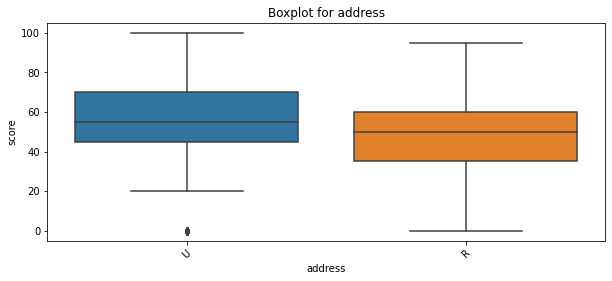

In [15]:
for col in ['address']:
    get_boxplot(col)

Похоже, горожане справились с экзаменом чуть лучше. Однако эту гипотезу стоит проверить.

In [16]:
for col in ['address']:
    get_stat_dif(col)

Статистически значимых различий нет


# Размер семьи

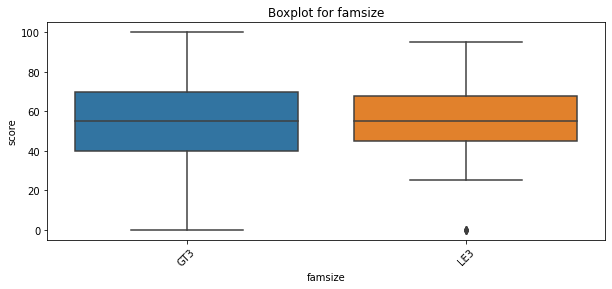

In [17]:
for col in ['famsize']:
    get_boxplot(col)

И снова медиана лежит почти на одном уровне при большей "кучности" результатов учеников из больших семей.

In [18]:
for col in ['famsize']:
    get_stat_dif(col)

Статистически значимых различий нет


# Статус совместного проживания родителей

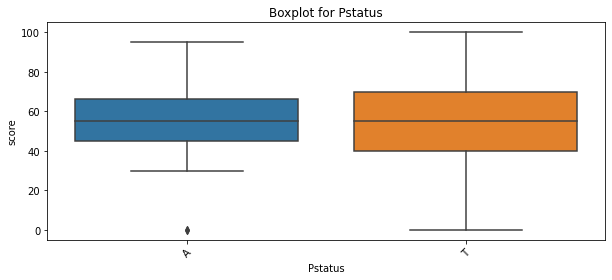

In [19]:
for col in ['Pstatus']:
    get_boxplot(col)

In [23]:
for col in ['Pstatus']:
    get_stat_dif(col)

Статистически значимых различий нет


# Профессия родителей

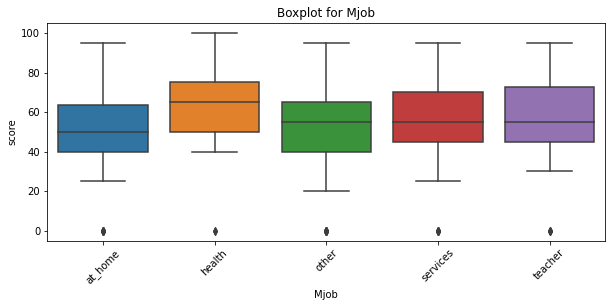

Статистически значимых различий нет
Статистически значимых различий нет
Статистически значимых различий нет
Статистически значимых различий нет
Статистически значимых различий нет
Статистически значимых различий нет
Статистически значимых различий нет
Статистически значимых различий нет
Найдены статистически значимые различия для колонки Mjob


In [45]:
for col in ['Mjob']:
    get_boxplot(col)
for col in ['Mjob']:
    get_stat_dif(col)

Кажется, лучше всех сдают экзамен дети врачей; заметно хуже - домокозяек.

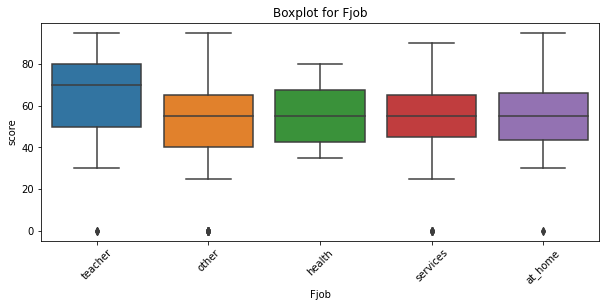

In [25]:
for col in ['Fjob']:
    get_boxplot(col)

А, вот, у неработающих отцов дети сдают экзамен,кажется, лучше. Может быть наработающие отцы - скрытые репетитры по математике?

In [26]:
for col in ['Fjob']:
    get_stat_dif(col)

Статистически значимых различий нет
Статистически значимых различий нет
Статистически значимых различий нет
Статистически значимых различий нет
Статистически значимых различий нет
Статистически значимых различий нет
Статистически значимых различий нет
Статистически значимых различий нет
Статистически значимых различий нет
Статистически значимых различий нет


А, нет. Показалось.

# Причина выбора школы

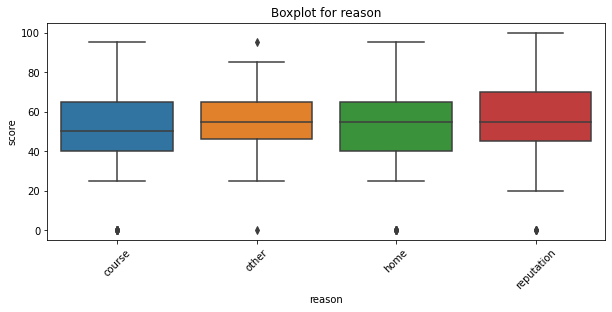

In [28]:
for col in ['reason']:
    get_boxplot(col)

In [29]:
for col in ['reason']:
    get_stat_dif(col)

Статистически значимых различий нет
Статистически значимых различий нет
Статистически значимых различий нет
Статистически значимых различий нет
Статистически значимых различий нет
Статистически значимых различий нет


Совсем не важно, почему ученик выбрал ту или иную школу. Да и какую именно выбрал - тоже не выжно.

# Опекун

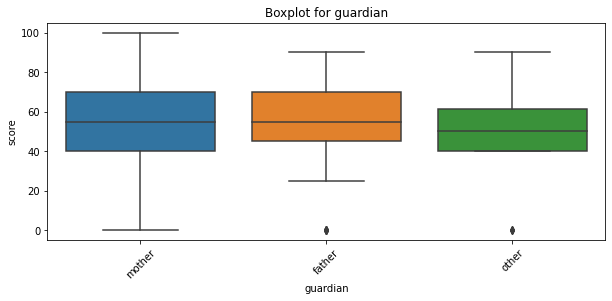

In [31]:
for col in ['guardian']:
    get_boxplot(col)

In [32]:
for col in ['guardian']:
    get_stat_dif(col)

Статистически значимых различий нет
Статистически значимых различий нет
Статистически значимых различий нет


Кто именно отвечает за ребёнка тоже не важно.

# Дополнительная образовательная поддержка

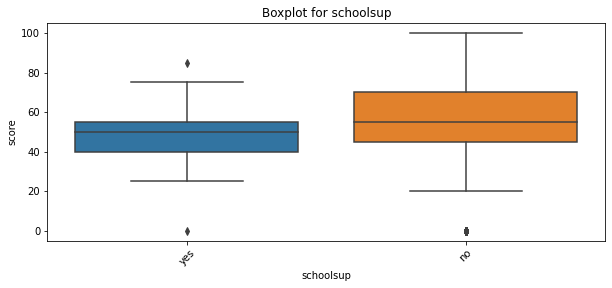

In [33]:
for col in ['schoolsup']:
    get_boxplot(col)

In [34]:
for col in ['schoolsup']:
    get_stat_dif(col)

Статистически значимых различий нет


# Семейная образовательная поддержка 

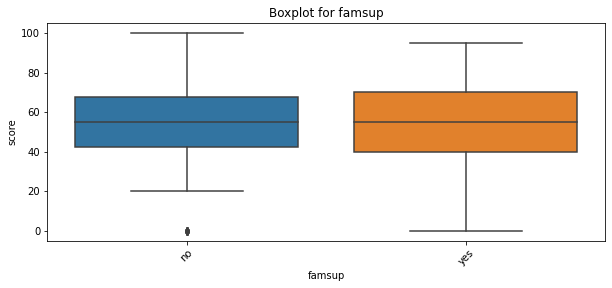

In [35]:
for col in ['famsup']:
    get_boxplot(col)

In [36]:
for col in ['famsup']:
    get_stat_dif(col)

Статистически значимых различий нет


# Дополнительные платные занятия по математике

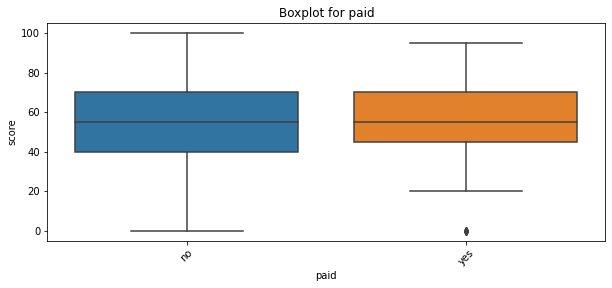

In [37]:
for col in ['paid']:
    get_boxplot(col)

In [38]:
for col in ['paid']:
    get_stat_dif(col)

Статистически значимых различий нет


Кажется, в найме репетитра смысла нет. Достаточно матери-врача.

# Дополнительные внеучебные занятия

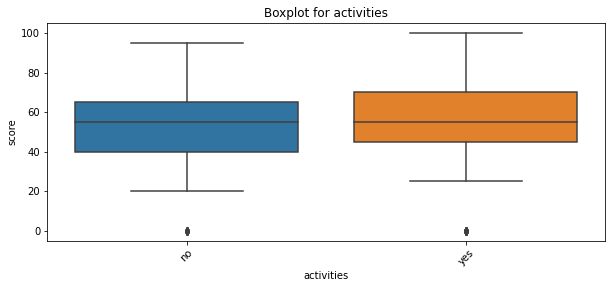

In [39]:
for col in ['activities']:
    get_boxplot(col)

Драм-кружок и кружок по фото никак не помешают. Но и не помогут.

# Посещал ли детский сад?

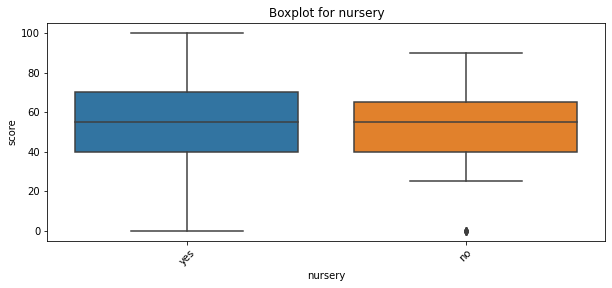

In [41]:
for col in ['nursery']:
    get_boxplot(col)

И детский сад в анамнезе -  тоже не панацея.

# Нацеленность на высшее образование

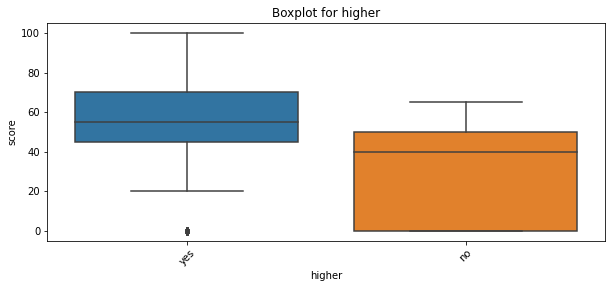

In [42]:
for col in ['higher']:
    get_boxplot(col)

In [43]:
for col in ['higher']:
    get_stat_dif(col)

Статистически значимых различий нет


Даже то. что мотивированные на высшее образование ученики в среднем сдают экзамен лучше, не даёт им значимого преимущества.

# Наличие доступа в Интернет

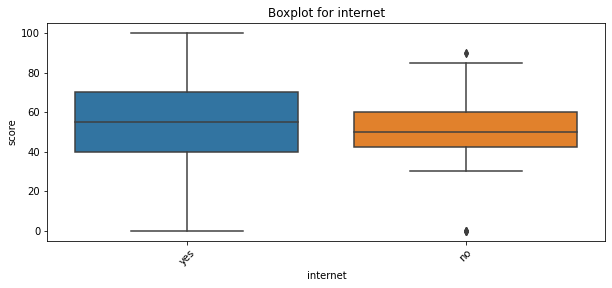

In [46]:
for col in ['internet']:
    get_boxplot(col)

Кто-то гуглит учебники, а кто-то залипает на котиков. Но в среднем разницы нет.

# Наличие романтических отношений

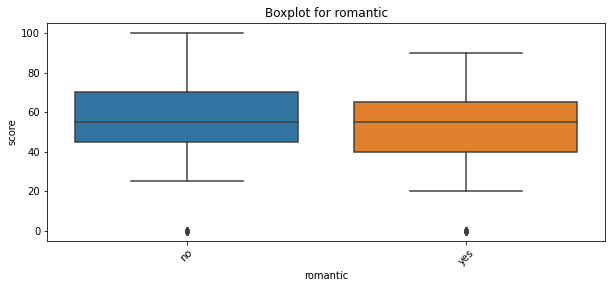

In [47]:
for col in ['romantic']:
    get_boxplot(col)

И нет, старшеклассник не потратит всё своё время на партнёра, если таковой появится, и не завалит из-за него экзамен.

# Выводы

Лучший способ успешно сдать экзамен по математике - родиться у мамы-врача (мед. работника с высшим образованием).Неплохо, если отец при этом не работает, но тоже не обделён хорошим образованием.
Для того, чтобы гарантированно провалить экзамен достаточно иметь достаточно много проблем помимо учёбы. Например, можно быть взрослым (старше 20) и устроиться на работу. Там проблемы точно найдутся. Всё остальное, как ни странно, не так важно.

# Переменные, выбранные для построения модели

Из числовых переменных наиболее значимы уровни образования родителей, а также время, которое ученик уделяет обучению вне школы. Важно также,сколько у ученика проблем вне школы и сколько времени он проводит с друзьями.
Из номенативных наиболее значимые параметры - сфера работы матери и нацеленность на высшее образование.